In [1]:
import pandas as pd

import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense,Input,InputLayer,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import joblib
from sklearn.ensemble import RandomForestClassifier
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2

In [2]:

data_path='traffic_Data/DATA/'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]
print(labels)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]


In [3]:
input_size = (100, 100)
data=[]
label=[]

for entry in labels:
    #print(label)
    folder_path=os.path.join(data_path,str(entry))
    #print(folder_path)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img = cv2.resize(img, input_size)
        img = img.astype('float32') / 255.0  # Normalize pixel values between 0 and 1
        #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
        data.append(img)
        label.append(entry)
        #appending the image and the label(categorized) into the list (dataset)

        
# Convert the image list and label list to numpy arrays
images = np.array(data)
labels = np.array(label)

# Shuffle the data (optional)
indices = np.random.permutation(len(images))
images = images[indices]
labels = labels[indices]

In [6]:
test_path=''
img_names=os.listdir(folder_path)

In [7]:
images.shape

(4170, 100, 100, 3)

In [8]:
labels.shape

(4170,)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [10]:
input_shape = (100, 100, 3)

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(58, activation='softmax')
])

c:\Users\mithu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 153664)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     9,834,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 58)             │         3,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,840,122 (37.54 MB)

 Trainable params: 9,840,122 (37.54 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
hist=model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.1592 - loss: 4.7189 - val_accuracy: 0.5120 - val_loss: 2.2655
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.6087 - loss: 1.8678 - val_accuracy: 0.7518 - val_loss: 1.0177
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.7951 - loss: 0.8764 - val_accuracy: 0.8465 - val_loss: 0.6027
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9142 - loss: 0.4041 - val_accuracy: 0.9125 - val_loss: 0.3329
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.9611 - loss: 0.2153 - val_accuracy: 0.9460 - val_loss: 0.2389
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.9876 - loss: 0.0968 - val_accuracy: 0.9700 - val_loss: 0.1435
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9933 - loss: 0.0614 - val_accuracy: 0.9760 - val_loss: 0.1090
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.9977 - loss: 0.0399 - val_accuracy: 0.9748

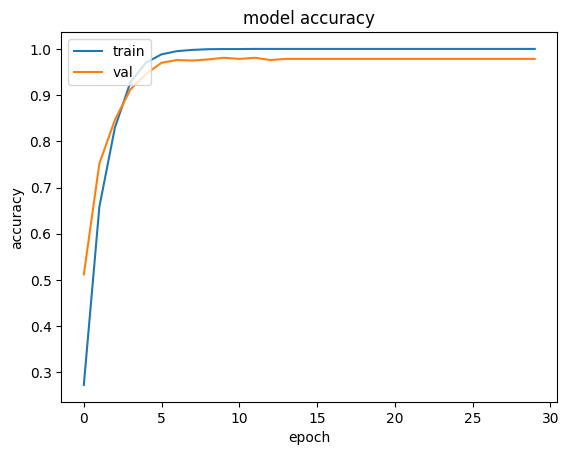

In [16]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

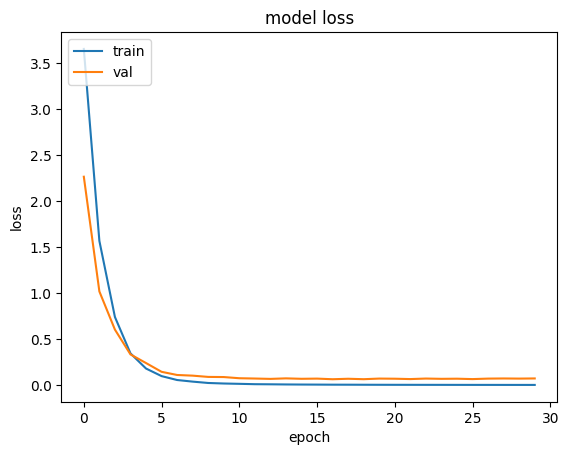

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [42]:
label = {0:"Speed Limit 5", 1:"Speed Limit 15", 2:"Speed Limit 30", 
         3:"Speed Limit 40", 4:"Speed Limit 50", 5:"Speed Limit 60", 
         6:"Speed Limit 80", 7:"Speed Limit 70", 8:"Don't go straight or left", 
         9:"Don't go straight or right", 10:"Don't go straight", 11:"No Left",
         12:"Don't go right or left", 13:"Don't go right", 14:"No Overtake from Left", 
         15:"No U-turn", 16:"No Cars", 17:"No Horn", 18:"Speed Limit (40km/h)",
         19:"Speed Limit (50km/h)", 20:"Go straight or right", 21:"Watch out for cars",
         22:"Go left", 23:"Go left or right", 24:"Go right", 25:"Keep Left",
         26:"Keep Right", 27:"Roundabout mandatory", 28:"Go Straight",
         29:"Horn", 30:"Bicycle Crossing", 31:"U-turn", 32:"Road Divider",
         33:"Traffic Signals", 34:"Danger ahead", 35:"Zebra Crossing",
         36:"Bicycle Crossing", 37:"Children Crossing", 38:"Dangerous curve to the left",
         39:"Dangerous curve to the right", 40:"Unknown 1", 41:"Unknown 2", 42:"Unknown 3",
         43:"Go right or straight", 44:"Go left or straight", 45:"Unknown 4", 
         46:"Zigzag curve", 47:"Train Crossing", 48:"Under construction", 49:"Unknown 5",
         50:"Fences", 51:"Heavy Vehicle Accidents", 52:"Unknown 6", 53:"Give way",
         54:"No Stopping", 55:"No Entry", 56:"Yield", 57:"Unknown 8"}

In [43]:
model.save('detectionmodel.h5',include_optimizer=True)

In [20]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


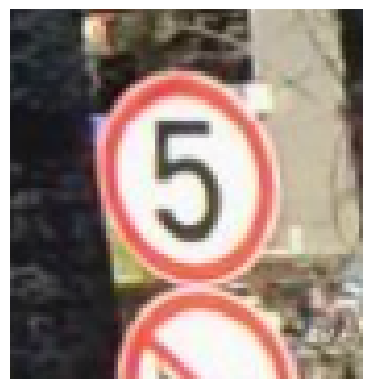

Predicted class: Speed Limit 5


In [44]:
img_directory = "traffic_Data/TEST/000_0002_j.png"
image = cv2.imread(img_directory)

# Preprocess the image using Keras functions
test_image = load_img(img_directory, target_size=(100, 100))  # Load and resize the image
test_image = img_to_array(test_image)  # Convert image to array
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Predict the class of the image
result = model.predict(test_image)

# Display the image using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Optional: Hide axis
plt.show()
predicted_class = label[np.argmax(result)]
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


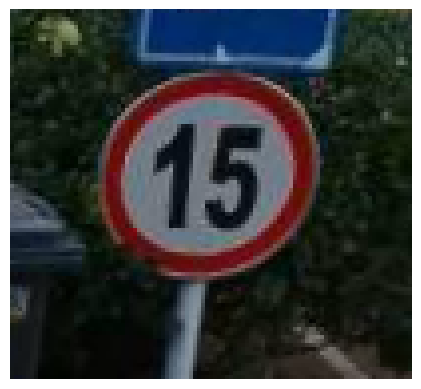

Predicted class: Speed Limit 15


In [45]:
img_directory = "traffic_Data/TEST/001_0005_j.png"
image = cv2.imread(img_directory)

# Preprocess the image using Keras functions
test_image = load_img(img_directory, target_size=(100, 100))  # Load and resize the image
test_image = img_to_array(test_image)  # Convert image to array
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Predict the class of the image
result = model.predict(test_image)

# Display the image using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Optional: Hide axis
plt.show()
predicted_class = label[np.argmax(result)]
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


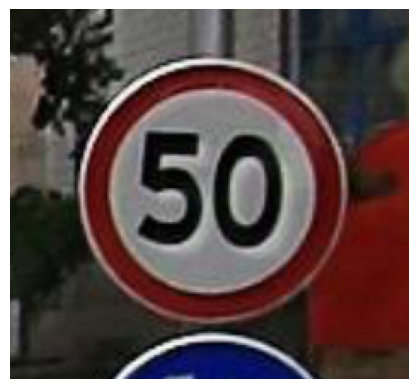

Predicted class: Speed Limit 50


In [46]:
img_directory = "traffic_Data/TEST/004_0001_j.png"
image = cv2.imread(img_directory)

# Preprocess the image using Keras functions
test_image = load_img(img_directory, target_size=(100, 100))  # Load and resize the image
test_image = img_to_array(test_image)  # Convert image to array
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Predict the class of the image
result = model.predict(test_image)

# Display the image using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Optional: Hide axis
plt.show()
predicted_class = label[np.argmax(result)]
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


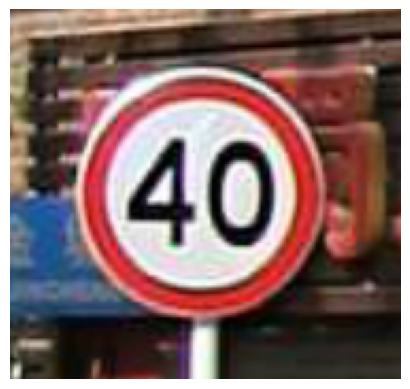

Predicted class: Speed Limit 40


In [47]:
img_directory = "traffic_Data/TEST/003_1_0014_1_j.png"
image = cv2.imread(img_directory)

# Preprocess the image using Keras functions
test_image = load_img(img_directory, target_size=(100, 100))  # Load and resize the image
test_image = img_to_array(test_image)  # Convert image to array
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Predict the class of the image
result = model.predict(test_image)

# Display the image using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Optional: Hide axis
plt.show()
predicted_class = label[np.argmax(result)]
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


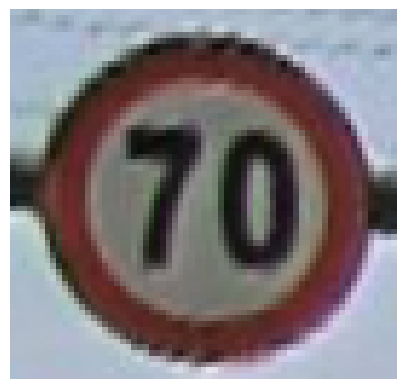

Predicted class: Speed Limit 70


In [48]:
img_directory = "traffic_Data/TEST/006_1_0002_1_j.png"
image = cv2.imread(img_directory)

# Preprocess the image using Keras functions
test_image = load_img(img_directory, target_size=(100, 100))  # Load and resize the image
test_image = img_to_array(test_image)  # Convert image to array
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

# Predict the class of the image
result = model.predict(test_image)

# Display the image using Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Optional: Hide axis
plt.show()
predicted_class = label[np.argmax(result)]
print(f"Predicted class: {predicted_class}")